In [55]:
# Data analysis
import pandas as pd 
import numpy as np
 
# visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score



In [57]:
# data
train_df = pd.read_csv('data/train_new.csv')
test_df = pd.read_csv('data/test_new.csv')
combine = [train_df, test_df]
train_df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,0,3,0,1,1,0,0,6,2,0,3
1,1,1,1,1,2,1,3,1,7,2,0,2
2,2,1,3,1,1,0,1,0,5,1,1,3
3,3,1,1,1,2,1,3,0,7,2,0,2
4,4,0,3,0,2,0,1,0,6,1,1,6


In [61]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

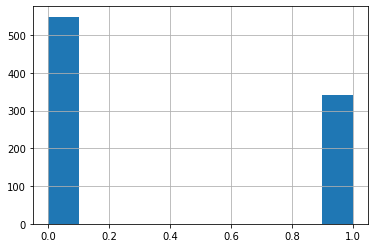

In [82]:
train_df['Survived'].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b6ae453c8>,
      dtype=object)

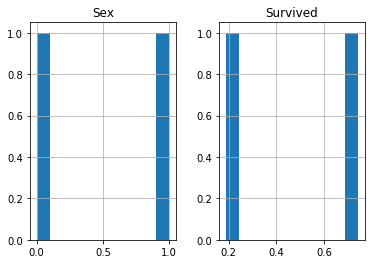

In [84]:
test = train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/home/andrey/Neural/neuralenv/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/andrey/Neural/neuralenv/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


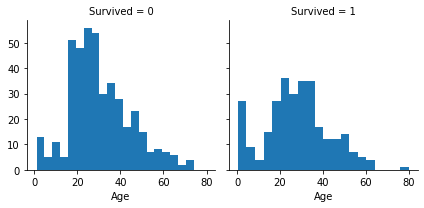

In [19]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [20]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Jonkheer', 'Dona'], 'Lady')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Col,0.500000
1,Dr,0.428571
2,Lady,0.666667
3,Master,0.575000
4,Miss,0.702703
5,Mr,0.156673
6,Mrs,0.793651
7,Rev,0.000000
8,Sir,0.400000


In [23]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,6


In [24]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [25]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,6
1,1,1,1,38.0,1,0,71.2833,C,7
2,1,3,1,26.0,0,0,7.9250,S,5
3,1,1,1,35.0,1,0,53.1000,S,7
4,0,3,0,35.0,0,0,8.0500,S,6


In [27]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,6
1,1,1,1,38,1,0,71.2833,C,7
2,1,3,1,26,0,0,7.9250,S,5
3,1,1,1,35,1,0,53.1000,S,7
4,0,3,0,35,0,0,8.0500,S,6


In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,6,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,7,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,5,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,7,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,6,"(32.0, 48.0]"


In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,6
1,1,1,1,2,1,0,71.2833,C,7
2,1,3,1,1,0,0,7.9250,S,5
3,1,1,1,2,1,0,53.1000,S,7
4,0,3,0,2,0,0,8.0500,S,6


In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
train_df = train_df.drop(['Parch',], axis=1)
test_df = test_df.drop(['Parch'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,7.2500,S,6,2,0
1,1,1,1,2,1,71.2833,C,7,2,0
2,1,3,1,1,0,7.9250,S,5,1,1
3,1,1,1,2,1,53.1000,S,7,2,0
4,0,3,0,2,0,8.0500,S,6,1,1


In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,7.2500,0,6,2,0,3
1,1,1,1,2,1,71.2833,1,7,2,0,2
2,1,3,1,1,0,7.9250,0,5,1,1,3
3,1,1,1,2,1,53.1000,0,7,2,0,2
4,0,3,0,2,0,8.0500,0,6,1,1,6


In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,7.8292,2,6,1,1,6
1,893,3,1,2,1,7.0000,0,7,2,0,6
2,894,2,0,3,0,9.6875,2,6,1,1,6
3,895,3,0,1,0,8.6625,0,6,1,1,3
4,896,3,1,1,1,12.2875,0,7,3,0,3


In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,0,6,2,0,3
1,1,1,1,2,1,3,1,7,2,0,2
2,1,3,1,1,0,1,0,5,1,1,3
3,1,1,1,2,1,3,0,7,2,0,2
4,0,3,0,2,0,1,0,6,1,1,6
5,0,3,0,1,0,1,2,6,1,1,3
6,0,1,0,3,0,3,0,6,1,1,3
7,0,3,0,0,3,2,0,4,5,0,0
8,1,3,1,1,0,1,0,7,3,0,3
9,1,2,1,0,1,2,1,7,2,0,0


In [41]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

X_train.head(10)

,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,3,0,1,1,0,0,6,2,0,3
1,1,1,2,1,3,1,7,2,0,2
2,3,1,1,0,1,0,5,1,1,3
3,1,1,2,1,3,0,7,2,0,2
4,3,0,2,0,1,0,6,1,1,6
5,3,0,1,0,1,2,6,1,1,3
6,1,0,3,0,3,0,6,1,1,3
7,3,0,0,3,2,0,4,5,0,0
8,3,1,1,0,1,0,7,3,0,3
9,2,1,0,1,2,1,7,2,0,0


In [42]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.23

In [43]:
X_dev, X_eval, y_dev, y_eval = train_test_split(X_train,
                                                Y_train,
                                                test_size=0.2,
                                                random_state=42)

X_test.head(10)

,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,3,0,2,0,0,2,6,1,1,6
1,3,1,2,1,0,0,7,2,0,6
2,2,0,3,0,1,2,6,1,1,6
3,3,0,1,0,1,0,6,1,1,3
4,3,1,1,1,1,0,7,3,0,3
5,3,0,0,0,1,0,6,1,1,0
6,3,1,1,0,0,2,5,1,1,3
7,2,0,1,1,2,0,6,3,0,2
8,3,1,1,0,0,1,7,1,1,3
9,3,0,1,2,2,0,6,3,0,3


In [44]:
import time
dict_clf = {}


paramgrid = {
    'n_estimators':      [100, 150, 200, 250, 300, 400, 500],
    'criterion':         ['gini', 'entropy'],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 8))
}
GS = GridSearchCV(RandomForestClassifier(random_state=77),
                  paramgrid,
                  cv=4)

# Fit the data and record time taking to train
t0 = time.time()
GS.fit(X_dev, y_dev)
t = time.time() - t0

# Store best parameters, score and estimator
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_

name = 'RF'

In [45]:
best_clf.fit(X_dev, y_dev)
acc_eval = accuracy_score(y_eval, best_clf.predict(X_eval))

dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

acc_eval

0.8156424581005587

In [48]:
from sklearn.ensemble import VotingClassifier

estimators = [('RF', dict_clf['RF']['best_clf'])]

# Instantiate the VotingClassifier using hard voting
voter = VotingClassifier(estimators=estimators, voting='hard')
voter.fit(X_train, Y_train)

Y_pred = voter.predict(X_test).astype(int)

In [49]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('data/result.csv', index=False)

In [53]:
train_df.to_csv('data/train_new.csv')

In [54]:
test_df.to_csv('data/test_new.csv')